In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sparsetools as sp
import random

In [8]:
obs = sp.profile('obs/ibis_alma6_alma3syn_obs.nc').extractPix(x1=320,y1=320)
mod_new = sp.model('alma6/ibis_alma6mod_mod_2.nc').extract(x1=320,y1=320)

profile::setsize: nx=334, ny=334, nw=95, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=95, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=334, ny=334, ndep=61, nt=1
model::setSize: nx = 334, ny = 334, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1


In [9]:
hot = np.where(obs.dat[0,:,:,-2,0]*5900>7500)
cool =  np.where(obs.dat[0,:,:,-2,0]*5900<6500)

In [10]:
n = 100
i_hot = random.sample(range(len(hot[0])),n)
i_cool = random.sample(range(len(cool[0])),n)

In [11]:
RF_mod_new = sp.model(nt=2,ny=n,nx=61,ndep=61)
pars = ['temp','vlos','vturb','nne','pgas','rho','ltau','cmass','z']
for par in pars:
    p = np.zeros((2,n,61,61))
    for i in range(n):
        p_hot = getattr(mod_new,par)[0,hot[0][i_hot[i]],hot[1][i_hot[i]]].reshape((1,1,1,61))
        p_cool = getattr(mod_new,par)[0,cool[0][i_cool[i]],cool[1][i_cool[i]]].reshape((1,1,1,61))
        p_cat = np.concatenate((p_hot,p_cool),0)
        p_tile = np.tile(p_cat,(1,1,61,1))
        p[:,i] = np.squeeze(p_tile)
    setattr(RF_mod_new,par,p)

model::setSize: nx = 61, ny = 100, ndep = 61, nt = 2


In [12]:
for i in range(61):
    RF_mod_new.temp[:,:,i,i] += 100

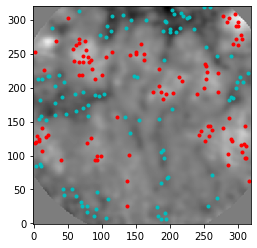

In [13]:
plt.imshow(obs.dat[0,:,:,-2,0],cmap='gist_gray',origin='lower')
for i in range(n):
    plt.plot(hot[1][i_hot[i]],hot[0][i_hot[i]],'.r')
    plt.plot(cool[1][i_cool[i]],cool[0][i_cool[i]],'.c')

In [14]:
RF_mod_new.write('band_6_many_RF_mod_both.nc')

model::write: band_6_many_RF_mod_both.nc -> nx=61, ny=100, ndep=61, nt=2


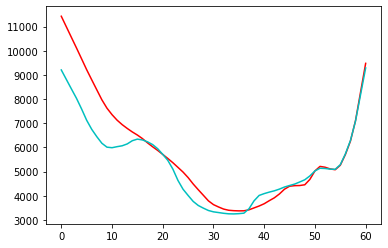

In [15]:
plt.plot(np.mean(RF_mod_new.temp[0],(0,1)),'-r')
plt.plot(np.mean(RF_mod_new.temp[1],(0,1)),'-c')